In [3]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
from flatten_json import flatten
import datetime
import time
import seaborn as sns

# Plotting settings
import mpld3
mpld3.enable_notebook()
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

In [4]:
class th_analysis():
    def __init__(self, filename):
        self.data = pd.read_csv(filename, sep=';')
    
    def get_th_dataframe(self):
        cols = self.data.columns
        self.data['Time'] = pd.to_datetime(self.data['Time'], utc=True)
        self.data.set_index('Time', inplace=True)
        self.data.index = self.data.index.tz_convert('America/Los_Angeles')
        self.data = self.data.sort_index()
#         self.data.set_index('Time', inplace=True)
        mask_t = self.data['Series'] == 'iot-devices.Temp1'
        mask_h = self.data['Series'] == 'iot-devices.Hum'
        return [self.data[mask_t], self.data[mask_h]]
    
    def daily_calculations(self, df):
        df_list = [group[1] for group in df.groupby(df.index.day)]    # split month into days
        day_time = {'morning':[datetime.time(6),datetime.time(12)], 'afternoon':[datetime.time(12),datetime.time(18)], 'evening':[datetime.time(18),datetime.time(0)], 'night':[datetime.time(0),datetime.time(6)]}
        output = {}
        for i in df_list:
            output[i.index.day[-1]] = [[i.between_time(day_time['morning'][0], day_time['morning'][1]).mean(), 
                                      i.between_time(day_time['afternoon'][0], day_time['afternoon'][1]).mean(),
                                     i.between_time(day_time['evening'][0], day_time['evening'][1]).mean(),
                                     i.between_time(day_time['night'][0], day_time['night'][1]).mean()],
                                     [i.between_time(day_time['morning'][0], day_time['morning'][1]).std(), 
                                      i.between_time(day_time['afternoon'][0], day_time['afternoon'][1]).std(),
                                     i.between_time(day_time['evening'][0], day_time['evening'][1]).std(),
                                     i.between_time(day_time['night'][0], day_time['night'][1]).std()]]
        return output
    
    def daily_calculations_hourly(self, df):
        df = df.resample('H').mean()
        df_list = [group[1] for group in df.groupby(df.index.day)]    # split month into days
        output = {}
        for i in df_list:
            output[i.index.day[-1]] = i
        return output
        
    

In [61]:
def daily_calculations1(df):
    df = df.resample('H').mean()
    df_list = [group[1] for group in df.groupby(df.index.day)]    # split month into days
    output = {}
    for i in df_list:
        output[i.index.day[-1]] = i
    return output


sensors = np.array(range(0,16))
temp_data = []
hum_data = []

output = {}
for i in sensors:
    obj = th_analysis('lora/june/grafana_data_export ('+str(i)+').csv')
    data = obj.get_th_dataframe()
    df_t = data[0]
    df_h = data[1]
    temp_data.append(daily_calculations1(df_t))
    hum_data.append(daily_calculations1(df_h))

sensors_data = {'Temp':temp_data, 'Hum':hum_data}    # temp_data -> sensor_id -> days -> values (m,a,e,n)

end_day = max(list(sensors_data['Temp'][0]))
i = min(list(sensors_data['Temp'][0]))
i = i+1
daily_data = []
for s in sensors_data['Temp']:
    daily_data.append(s[i])

# sensor_list = []
# for i in range(0,16):
#     sensor_list.append('S'+str(i))

# daily_data


In [99]:
# test_df = pd.DataFrame(daily_data[0])
daily_data[0]['Value']
# ind = test_df.index
# values = []
# for i in daily_data:
#     val.append(i.values)


# sensors_data['Temp']
# i
# temp_data[0][3]


Time
2019-06-04 00:00:00-07:00     72.280
2019-06-04 01:00:00-07:00     71.180
2019-06-04 02:00:00-07:00     69.800
2019-06-04 03:00:00-07:00     69.065
2019-06-04 04:00:00-07:00     67.835
2019-06-04 05:00:00-07:00     67.445
2019-06-04 06:00:00-07:00     70.790
2019-06-04 07:00:00-07:00     72.950
2019-06-04 08:00:00-07:00     77.195
2019-06-04 09:00:00-07:00     81.155
2019-06-04 10:00:00-07:00     85.010
2019-06-04 11:00:00-07:00     87.245
2019-06-04 12:00:00-07:00     90.365
2019-06-04 13:00:00-07:00     92.465
2019-06-04 14:00:00-07:00     94.505
2019-06-04 15:00:00-07:00     96.680
2019-06-04 16:00:00-07:00    103.385
2019-06-04 17:00:00-07:00    112.415
2019-06-04 18:00:00-07:00    108.380
2019-06-04 19:00:00-07:00    101.630
2019-06-04 20:00:00-07:00     87.365
2019-06-04 21:00:00-07:00     82.715
2019-06-04 22:00:00-07:00     80.045
2019-06-04 23:00:00-07:00     77.240
Freq: H, Name: Value, dtype: float64

# Temperature - June

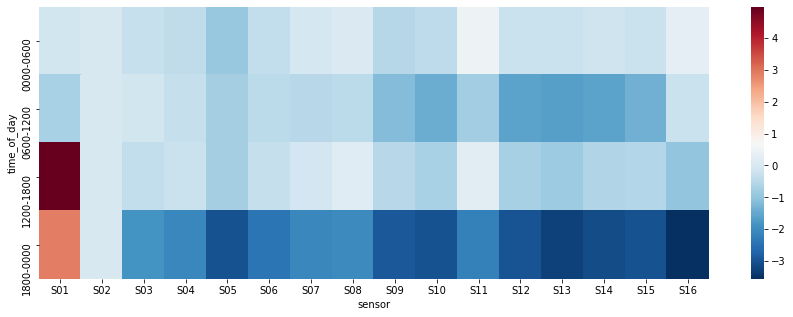

In [12]:
sensors = np.array(range(0,16))
temp_data = []
hum_data = []

for i in sensors:
    obj = th_analysis('lora/june/grafana_data_export ('+str(i)+').csv')
    data = obj.get_th_dataframe()
    df_t = data[0]
    df_h = data[1]
    # df_t.head()
    # print(df_t.index.is_unique)
    temp_data.append(obj.daily_calculations(df_t))
    hum_data.append(obj.daily_calculations(df_h))

sensors_data = {'Temp':temp_data, 'Hum':hum_data}    # temp_data -> sensor_id -> days -> values (m,a,e,n)

end_day = max(list(sensors_data['Temp'][0]))
i = min(list(sensors_data['Temp'][0]))
i = i+1
diff_daily = {}
while i < end_day+1:
    daily_data = []
    for s in sensors_data['Temp']:
        daily_data.append(s[i][0])

    diff_temp = []
    for d in daily_data:
        base = np.array(d[1])
        diff_temp.append(np.array(d)-np.array(daily_data[1]))

    diff_daily[i] = diff_temp
    i = i+1
    
        
day_values = list(diff_daily.values())[0]
morning = []
afternoon = []
evening = []
night = []
sensor_list = []
for i in range(0,16):
    sensor_list.append('S'+str(i))
sensor_list

# Build heat map

for i in day_values:
    morning.append(i[0][0])
    afternoon.append(i[1][0])
    evening.append(i[2][0])
    night.append(i[3][0])
df_daily = pd.DataFrame({'morning': morning, 'afternoon':afternoon, 'evening':evening, 'night':night, 'sensor':sensor_list})


        
# time_of_day = ['morning']*16 + ['afternoon']*16 + ['evening']*16 + ['night']*16
time_of_day = ['0000-0600']*16 + ['0600-1200']*16 + ['1200-1800']*16 + ['1800-0000']*16
data = df_daily['night'].tolist()+df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()
# data = df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()+df_daily['night'].tolist()
sensor = []
for i in range(1,17):
    if i < 10:
        sensor.append('S0'+str(i))
    else:
        sensor.append('S'+str(i))
    
sensor = sensor*4
d = {'time_of_day':time_of_day, 'data':data, 'sensor':sensor}
df_hm = pd.DataFrame(d)
heatmap1_data = pd.pivot_table(df_hm, values='data', 
                     index=['time_of_day'], 
                     columns='sensor')

        
sns.heatmap(heatmap1_data, cmap="RdBu_r")

# Humidity - June

In [5]:
# daily_data
# sensors_data['Hum']
# diff_temp
# day_values = list(diff_daily.values())[0]
# day_values1
# daily_data[0][0]

In [33]:
# day_values

In [30]:
sensors = np.array(range(0,16))
temp_data = []
hum_data = []

for i in sensors:
    obj = th_analysis('lora/june/grafana_data_export ('+str(i)+').csv')
    data = obj.get_th_dataframe()
    df_t = data[0]
    df_h = data[1]
    # df_t.head()
    # print(df_t.index.is_unique)
    temp_data.append(obj.daily_calculations(df_t))
    hum_data.append(obj.daily_calculations(df_h))

sensors_data = {'Temp':temp_data, 'Hum':hum_data}    # temp_data -> sensor_id -> days -> values (m,a,e,n)

end_day = max(list(sensors_data['Hum'][0]))
i = min(list(sensors_data['Hum'][0]))
i = i+1
diff_daily = {}
# while i < end_day+1:
i=4
daily_data = []
for s in sensors_data['Hum']:
    daily_data.append(s[i][0])

diff_temp = []
for d in daily_data:
    base = np.array(d[1])
    diff_temp.append(np.array(d)-np.array(daily_data[1]))

diff_daily[i] = diff_temp
i = i+1

morning = []
afternoon = []
evening = []
night = []
sensor_list = []
for i in range(0,16):
    sensor_list.append('S'+str(i))
sensor_list
for i in daily_data:
    morning.append(i[0].values[0])
    afternoon.append(i[1].values[0])
    evening.append(i[2].values[0])
    night.append(i[3].values[0])

# print(len(morning))
# print(len(afternoon))
# print(len(evening))
# print(len(night))
df_daily = pd.DataFrame({'morning': morning, 'afternoon':afternoon, 'evening':evening, 'night':night, 'sensor':sensor_list})


        
# time_of_day = ['morning']*16 + ['afternoon']*16 + ['evening']*16 + ['night']*16
time_of_day = ['0000-0600']*16 + ['0600-1200']*16 + ['1200-1800']*16 + ['1800-0000']*16
data = df_daily['night'].tolist()+df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()
# data = df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()+df_daily['night'].tolist()
sensor = []
for i in range(1,17):
    if i < 10:
        sensor.append('S0'+str(i))
    else:
        sensor.append('S'+str(i))
    
sensor = sensor*4
d = {'time_of_day':time_of_day, 'data':data, 'sensor':sensor}
df_hm = pd.DataFrame(d)
heatmap1_data = pd.pivot_table(df_hm, values='data', 
                     index=['time_of_day'], 
                     columns='sensor')

        
sns.heatmap(heatmap1_data, cmap="RdBu_r")

16
16
16
16


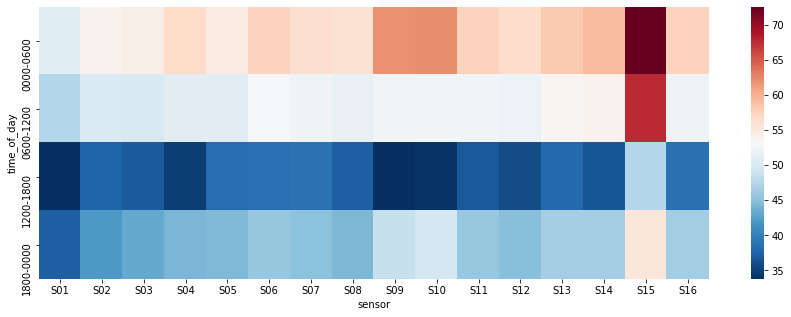

In [32]:
# morning[0].values[0]
# daily_data[0][0].values[0]
# df_hm.head()
heatmap1_data = pd.pivot_table(df_hm, values='data', 
                     index=['time_of_day'], 
                     columns='sensor')

        
sns.heatmap(heatmap1_data, cmap="RdBu_r")

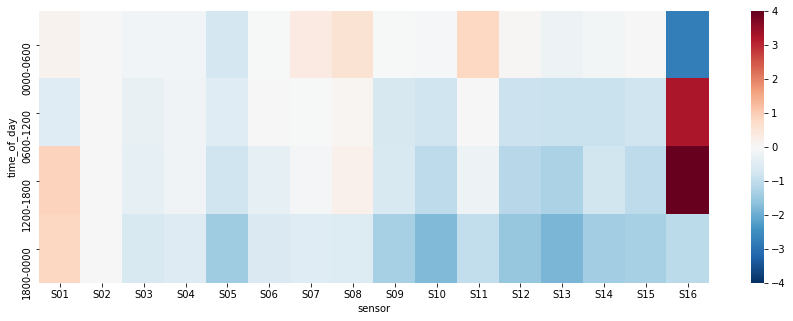

In [21]:
sensors = np.array(range(0,16))
temp_data = []
hum_data = []

for i in sensors:
    obj = th_analysis('lora/july/grafana_data_export ('+str(i)+').csv')
    data = obj.get_th_dataframe()
    df_t = data[0]
    df_h = data[1]
    # df_t.head()
    # print(df_t.index.is_unique)
    temp_data.append(obj.daily_calculations(df_t))
    hum_data.append(obj.daily_calculations(df_h))

sensors_data = {'Temp':temp_data, 'Hum':hum_data}    # temp_data -> sensor_id -> days -> values (m,a,e,n)

end_day = max(list(sensors_data['Temp'][0]))
i = min(list(sensors_data['Temp'][0]))
i = i+1
diff_daily = {}
while i < end_day+1:
    daily_data = []
    for s in sensors_data['Temp']:
        daily_data.append(s[i][0])

    diff_temp = []
    for d in daily_data:
        base = np.array(d[1])
        diff_temp.append(np.array(d)-np.array(daily_data[1]))

    diff_daily[i] = diff_temp
    i = i+1
    
        
day_values = list(diff_daily.values())[0]
morning = []
afternoon = []
evening = []
night = []
sensor_list = []
for i in range(0,16):
    sensor_list.append('S'+str(i))
sensor_list

# Build heat map

for i in day_values:
    morning.append(i[0][0])
    afternoon.append(i[1][0])
    evening.append(i[2][0])
    night.append(i[3][0])
df_daily = pd.DataFrame({'morning': morning, 'afternoon':afternoon, 'evening':evening, 'night':night, 'sensor':sensor_list})


        
# time_of_day = ['morning']*16 + ['afternoon']*16 + ['evening']*16 + ['night']*16
time_of_day = ['0000-0600']*16 + ['0600-1200']*16 + ['1200-1800']*16 + ['1800-0000']*16
data = df_daily['night'].tolist()+df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()
# data = df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()+df_daily['night'].tolist()
sensor = []
for i in range(1,17):
    if i < 10:
        sensor.append('S0'+str(i))
    else:
        sensor.append('S'+str(i))
    
sensor = sensor*4
d = {'time_of_day':time_of_day, 'data':data, 'sensor':sensor}
df_hm = pd.DataFrame(d)
heatmap1_data = pd.pivot_table(df_hm, values='data', 
                     index=['time_of_day'], 
                     columns='sensor')

        
sns.heatmap(heatmap1_data, cmap="RdBu_r",vmin=-4, vmax=4)

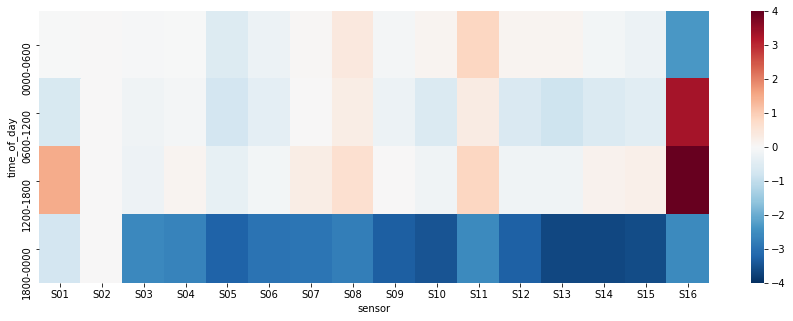

In [22]:
sensors = np.array(range(0,16))
temp_data = []
hum_data = []

for i in sensors:
    obj = th_analysis('lora/august/grafana_data_export ('+str(i)+').csv')
    data = obj.get_th_dataframe()
    df_t = data[0]
    df_h = data[1]
    # df_t.head()
    # print(df_t.index.is_unique)
    temp_data.append(obj.daily_calculations(df_t))
    hum_data.append(obj.daily_calculations(df_h))

sensors_data = {'Temp':temp_data, 'Hum':hum_data}    # temp_data -> sensor_id -> days -> values (m,a,e,n)

end_day = max(list(sensors_data['Temp'][0]))
i = min(list(sensors_data['Temp'][0]))
i = i+1
diff_daily = {}
while i < end_day+1:
    daily_data = []
    for s in sensors_data['Temp']:
        daily_data.append(s[i][0])

    diff_temp = []
    for d in daily_data:
        base = np.array(d[1])
        diff_temp.append(np.array(d)-np.array(daily_data[1]))

    diff_daily[i] = diff_temp
    i = i+1
    
        
day_values = list(diff_daily.values())[0]
morning = []
afternoon = []
evening = []
night = []
sensor_list = []
for i in range(0,16):
    sensor_list.append('S'+str(i))
sensor_list

# Build heat map

for i in day_values:
    morning.append(i[0][0])
    afternoon.append(i[1][0])
    evening.append(i[2][0])
    night.append(i[3][0])
df_daily = pd.DataFrame({'morning': morning, 'afternoon':afternoon, 'evening':evening, 'night':night, 'sensor':sensor_list})


        
# time_of_day = ['morning']*16 + ['afternoon']*16 + ['evening']*16 + ['night']*16
time_of_day = ['0000-0600']*16 + ['0600-1200']*16 + ['1200-1800']*16 + ['1800-0000']*16
data = df_daily['night'].tolist()+df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()
# data = df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()+df_daily['night'].tolist()
sensor = []
for i in range(1,17):
    if i < 10:
        sensor.append('S0'+str(i))
    else:
        sensor.append('S'+str(i))
    
sensor = sensor*4
d = {'time_of_day':time_of_day, 'data':data, 'sensor':sensor}
df_hm = pd.DataFrame(d)
heatmap1_data = pd.pivot_table(df_hm, values='data', 
                     index=['time_of_day'], 
                     columns='sensor')

        
sns.heatmap(heatmap1_data, cmap="RdBu_r",vmin=-4, vmax=4)

In [40]:
# sensors_data['Temp'][0]
# diff_daily
# day_values
# diff_daily.values()

In [4]:
end_day = max(list(sensors_data['Temp'][0]))
i = min(list(sensors_data['Temp'][0]))
i = i+1
diff_daily = {}
while i < end_day+1:
    daily_data = []
    for s in sensors_data['Temp']:
        daily_data.append(s[i][0])

    diff_temp = []
    for d in daily_data:
        base = np.array(d[1])
        diff_temp.append(np.array(d)-np.array(daily_data[1]))

    diff_daily[i] = diff_temp
    i = i+1
    
        
    


In [5]:
day_values = list(diff_daily.values())[0]
morning = []
afternoon = []
evening = []
night = []
sensor_list = []
for i in range(0,16):
    sensor_list.append('S'+str(i))
sensor_list

# Build heat map

for i in day_values:
    morning.append(i[0][0])
    afternoon.append(i[1][0])
    evening.append(i[2][0])
    night.append(i[3][0])
df_daily = pd.DataFrame({'morning': morning, 'afternoon':afternoon, 'evening':evening, 'night':night, 'sensor':sensor_list})
# df_daily.plot.bar(rot=0)
df_daily.head()

,morning,afternoon,evening,night,sensor
0,-0.689211,4.968947,2.901316,-0.111316,S0
1,0.000000,0.000000,0.000000,0.000000,S1
2,-0.092368,-0.333947,-1.852895,-0.270000,S2
3,-0.309474,-0.240000,-2.062105,-0.365526,S3
4,-0.730263,-0.731842,-3.019737,-0.893684,S4


In [28]:
# df_daily_pivot = pd.pivot_table(df_daily, values='lifeExp', 
#                      index=['continent'], 
#                      columns='year')
# df_daily['test'] = df_daily['morning'].tolist()


In [6]:
# time_of_day = ['morning']*16 + ['afternoon']*16 + ['evening']*16 + ['night']*16
time_of_day = ['0000-0600']*16 + ['0600-1200']*16 + ['1200-1800']*16 + ['1800-0000']*16
data = df_daily['night'].tolist()+df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()
# data = df_daily['morning'].tolist()+df_daily['afternoon'].tolist()+df_daily['evening'].tolist()+df_daily['night'].tolist()
sensor = []
for i in range(1,17):
    if i < 10:
        sensor.append('S0'+str(i))
    else:
        sensor.append('S'+str(i))
    
sensor = sensor*4
d = {'time_of_day':time_of_day, 'data':data, 'sensor':sensor}
df_hm = pd.DataFrame(d)
heatmap1_data = pd.pivot_table(df_hm, values='data', 
                     index=['time_of_day'], 
                     columns='sensor')


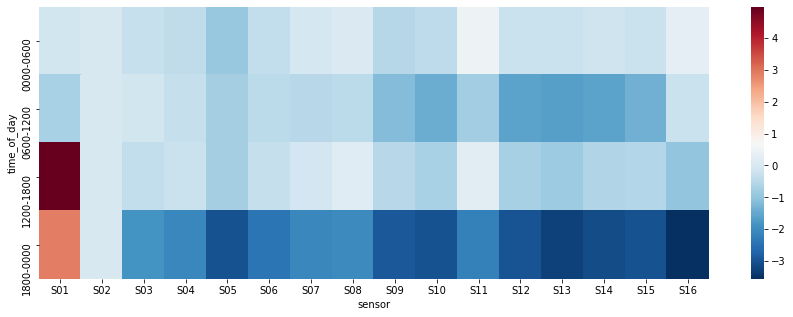

In [11]:
sns.heatmap(heatmap1_data, cmap="RdBu_r")

In [39]:
# list(sensors_data['Temp'][0].values())[1]
# sensors_data['Temp'][1]

In [111]:
morning = [datetime.time(6),datetime.time(12)]
df_list[1]['time'] = df_list[1].index.time
# bol = df_list[1].time >= morning[1] and df_list[1].time < morning[1]
# bol
# df_list[1].time >= morning[1]
a = df_list[1].between_time(morning[0],morning[1])
# a['Value'].mean()
a['Value'].std()


6.5737156039872335

In [35]:


data = pd.read_csv("grafana_data_export.csv", sep=';')
data.head()
mask_t = []
mask_t = data['Series'] == 'iot-devices.Temp1'
mask_h = data['Series'] == 'iot-devices.Hum'

df_t = data[mask_t]
df_t.set_index('Time', inplace=True)
df_t.head()
# df_h = data[mask_h]


,Series,Value
Time,,
2019-06-03T23:40:00-07:00,iot-devices.Temp1,72.86
2019-06-04T00:00:00-07:00,iot-devices.Temp1,72.86
2019-06-04T00:20:00-07:00,iot-devices.Temp1,72.02
2019-06-04T00:40:00-07:00,iot-devices.Temp1,71.96
2019-06-04T01:00:00-07:00,iot-devices.Temp1,71.42


In [36]:
mask_t

0        True
1        True
2        True
3        True
4        True
        ...  
3783    False
3784    False
3785    False
3786    False
3787    False
Name: Series, Length: 3788, dtype: bool

In [4]:
lora_pd = lora_pd[['timestamp', 'rel_humidity','temperature']]
lora_pd['timestamp'] = pd.to_datetime(lora_pd['timestamp'], utc=True)
lora_pd.set_index('timestamp', inplace=True)
lora_pd.index = lora_pd.index.tz_convert('America/Los_Angeles')
lora_pd = lora_pd.sort_index()

KeyError: "None of [Index(['timestamp', 'rel_humidity', 'temperature'], dtype='object')] are in the [columns]"

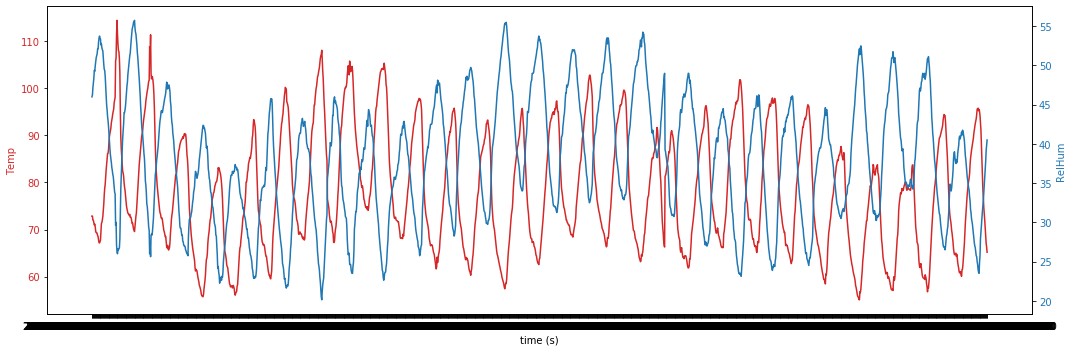

In [28]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temp', color=color)  # we already handled the x-label with ax1
ax1.plot(df_t['Time'], df_t['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('RelHum', color=color)
ax2.plot(df_h['Time'], df_h['Value'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
sensors = np.array(range(0,16))
temp_data = []
hum_data = []

# for i in sensors:
i=0
obj = th_analysis('lora/june/grafana_data_export ('+str(i)+').csv')
data = obj.get_th_dataframe()
df_t = data[0]
df_h = data[1]
# df_t.head()
# print(df_t.index.is_unique)
temp_data.append(obj.daily_calculations(df_t))
hum_data.append(obj.daily_calculations(df_h))

sensors_data = {'Temp':temp_data, 'Hum':hum_data}    # temp_data -> sensor_id -> days -> values (m,a,e,n)


In [37]:
df_t.head(20)

,Series,Value
Time,,
2019-06-03 23:40:00-07:00,iot-devices.Temp1,72.860
2019-06-04 00:00:00-07:00,iot-devices.Temp1,72.860
2019-06-04 00:20:00-07:00,iot-devices.Temp1,72.020
2019-06-04 00:40:00-07:00,iot-devices.Temp1,71.960
2019-06-04 01:00:00-07:00,iot-devices.Temp1,71.420
2019-06-04 01:20:00-07:00,iot-devices.Temp1,70.970
2019-06-04 01:40:00-07:00,iot-devices.Temp1,71.150
2019-06-04 02:00:00-07:00,iot-devices.Temp1,70.520
2019-06-04 02:20:00-07:00,iot-devices.Temp1,69.530


In [38]:
def daily_calculations1(df):
    df = df.resample('H').mean()
    df_list = [group[1] for group in df.groupby(df.index.day)]    # split month into days
#     day_time = {'morning':[datetime.time(6),datetime.time(12)], 'afternoon':[datetime.time(12),datetime.time(18)], 'evening':[datetime.time(18),datetime.time(0)], 'night':[datetime.time(0),datetime.time(6)]}
    output = {}
    for i in df_list:
        output[i.index.day[-1]] = 

        [[i.between_time(day_time['morning'][0], day_time['morning'][1]).mean(), 
                                  i.between_time(day_time['afternoon'][0], day_time['afternoon'][1]).mean(),
                                 i.between_time(day_time['evening'][0], day_time['evening'][1]).mean(),
                                 i.between_time(day_time['night'][0], day_time['night'][1]).mean()],
                                 [i.between_time(day_time['morning'][0], day_time['morning'][1]).std(), 
                                  i.between_time(day_time['afternoon'][0], day_time['afternoon'][1]).std(),
                                 i.between_time(day_time['evening'][0], day_time['evening'][1]).std(),
                                 i.between_time(day_time['night'][0], day_time['night'][1]).std()]]
    return output
test = df_t.resample('H').mean()
test.head(20)

,Value
Time,
2019-06-03 23:00:00-07:00,72.860
2019-06-04 00:00:00-07:00,72.280
2019-06-04 01:00:00-07:00,71.180
2019-06-04 02:00:00-07:00,69.800
2019-06-04 03:00:00-07:00,69.065
2019-06-04 04:00:00-07:00,67.835
2019-06-04 05:00:00-07:00,67.445
2019-06-04 06:00:00-07:00,70.790
2019-06-04 07:00:00-07:00,72.950


In [101]:
a = [[[0,1,2,3,4],[5,6,7,8,9],[10,11,12,13,14]],[['a','b','c','d'],['e','f','g','h']]]
len(a)

2

In [107]:
len(a[0][])

IndexError: list index out of range

In [112]:
a[:][1]

[['a', 'b', 'c', 'd'], ['e', 'f', 'g', 'h']]

In [113]:
58.8*0.55


32.34

In [114]:
34-(0.55-0.055*40)*(34-58.8)

-6.920000000000002